In [30]:
import numpy  as np
import pandas as pd

print('numpy  version - ' , np.__version__) 
print('pandas version - ' , pd.__version__) 

from   io import StringIO
import missingno as msno
# ml
import sklearn
from   sklearn.datasets import load_iris, load_breast_cancer

print('sklearn version - ' , sklearn.__version__)

from sklearn.model_selection import train_test_split, KFold , StratifiedKFold , cross_val_score, cross_validate, GridSearchCV 
from sklearn.tree            import DecisionTreeClassifier
from sklearn.ensemble        import RandomForestClassifier         
from sklearn.linear_model    import LogisticRegression, LinearRegression


from sklearn.metrics         import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix, make_scorer, precision_recall_curve
from sklearn.impute          import SimpleImputer

from sklearn.preprocessing   import LabelEncoder, OneHotEncoder, StandardScaler, MinMaxScaler

from IPython.display import Image

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

numpy  version -  1.20.3
pandas version -  1.3.4
sklearn version -  0.24.2


## Regression(회귀)
- 회귀란 종속변수(target)와 하나이상의 독립변수(feature)간의 관계를 모델링하는 선형 또는 비성현 접근법
- 예측(분류가 아닌)이고 예측을 위해서는 종속변수의 타입은 연속된 숫자이여야 한다.
- 회귀분석은 데이터 값이 평균과 같은 일정한 값으로 돌아가려는 경향을 이용한 통계학 기법이다.
- Y = (w * x) + b     
- cost(w, b) - 업데이트를 통해서 예측값과 실제값의 차이를 계산
- w : weight, b : bias
- 회귀계수 : coefficients -> 독립변수가 종속변수에 미치는 영향의 강도
- 회귀유형 : 독립변수가 1개이면  단일회귀 - 선형회귀
- 회귀유형 : 독립변수가 여러개이면  다중회귀 - 비선형회귀

In [21]:
print('단일회귀 - ')
frm = pd.DataFrame({
    "height" : [1.47, 1.50, 1.52, 1.57, 1.60, 1.63, 1.66, 1.70, 1.75, 1.78, 1.82],
    "mass"   : [52.21, 53.12, 54.35, 55.53, 56.33, 57.78, 58.12, 59.36, 60.5, 61.34, 63.12]
})
frm

단일회귀 - 


,height,mass
0,1.47,52.21
1,1.50,53.12
2,1.52,54.35
3,1.57,55.53
4,1.60,56.33
5,1.63,57.78
6,1.66,58.12
7,1.70,59.36
8,1.75,60.50
9,1.78,61.34


In [22]:
print("독립변수 또는 설명변수 - ")
print('type - ',type(frm[['height']]), frm[['height']].shape)
x = frm[['height']]

독립변수 또는 설명변수 - 
type -  <class 'pandas.core.frame.DataFrame'> (11, 1)


In [23]:
print("종속변수 - ")
print('type - ',type(frm[['mass']]), frm[['mass']].shape)
y = frm[['mass']]

종속변수 - 
type -  <class 'pandas.core.frame.DataFrame'> (11, 1)


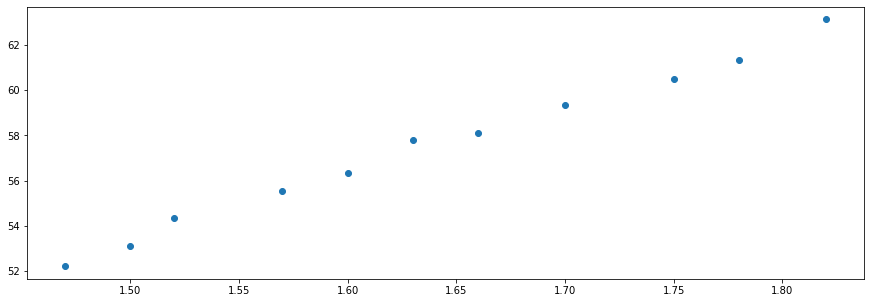

In [28]:
plt.figure(figsize=(15,5))

plt.plot(x,y,'o')

plt.show()
plt.close()

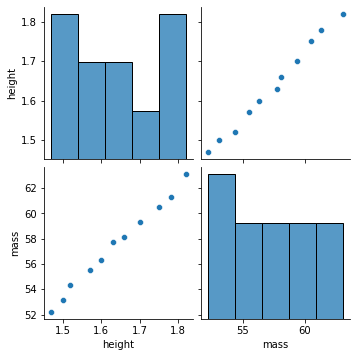

In [27]:
sns.pairplot(frm)
plt.show()
plt.close()

In [32]:
linear_model = LinearRegression()
linear_model.fit(x,y)

LinearRegression()

In [35]:
print('사용자 데이터를 입력하여 예측값을 확인 - ')
user_pred = linear_model.predict([[1.79]])
print('user pred - ',user_pred)
y_pred = linear_model.predict(x)
print('y_pred - ',y_pred)

사용자 데이터를 입력하여 예측값을 확인 - 
user pred -  [[61.98511905]]
y_pred -  [[52.50321429]
 [53.39214286]
 [53.9847619 ]
 [55.46630952]
 [56.3552381 ]
 [57.24416667]
 [58.13309524]
 [59.31833333]
 [60.79988095]
 [61.68880952]
 [62.87404762]]


In [45]:
print("w = 기울기 : ",linear_model.coef_)
print()
print("b = 절편   : ",linear_model.intercept_)

w = 기울기 :  [[29.63095238]]

b = 절편   :  [8.94571429]


In [46]:
(29.63095238 * 1.79) + 8.94571429  #위에 1.79 = user pred - [[61.98511905]]

61.9851190502

In [47]:
print("R - squared(결정계수) - ")
print()
print("R - ", linear_model.score(x,y))

R - squared(결정계수) - 

R -  0.9929305685984781


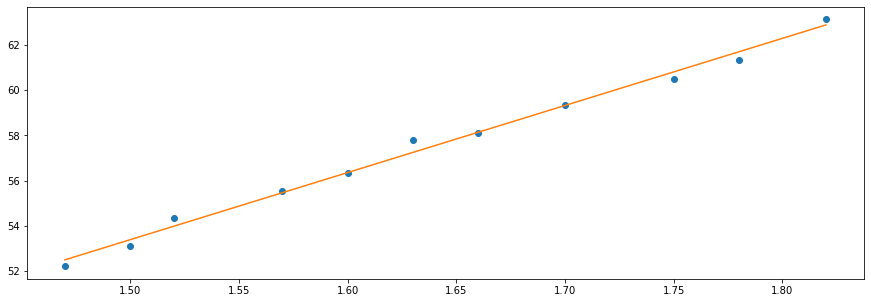

In [49]:
plt.figure(figsize=(15,5))

plt.plot(x,y,'o')
plt.plot(x,y_pred)

plt.show()
plt.close()

In [55]:
mpg_frm = pd.read_csv('./data/auto-mpg.csv', header=None)
mpg_frm.columns = ['mpg', 'cylinders', 'displacement', 'horsepower','weight', 'acc','model year', 'orgin', 'name']
mpg_frm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    float64
 5   acc           398 non-null    float64
 6   model year    398 non-null    int64  
 7   orgin         398 non-null    int64  
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [56]:
mpg_frm.describe()

,mpg,cylinders,displacement,weight,acc,model year,orgin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


In [58]:
mpg_frm['horsepower'].unique()

array(['130.0', '165.0', '150.0', '140.0', '198.0', '220.0', '215.0',
       '225.0', '190.0', '170.0', '160.0', '95.00', '97.00', '85.00',
       '88.00', '46.00', '87.00', '90.00', '113.0', '200.0', '210.0',
       '193.0', '?', '100.0', '105.0', '175.0', '153.0', '180.0', '110.0',
       '72.00', '86.00', '70.00', '76.00', '65.00', '69.00', '60.00',
       '80.00', '54.00', '208.0', '155.0', '112.0', '92.00', '145.0',
       '137.0', '158.0', '167.0', '94.00', '107.0', '230.0', '49.00',
       '75.00', '91.00', '122.0', '67.00', '83.00', '78.00', '52.00',
       '61.00', '93.00', '148.0', '129.0', '96.00', '71.00', '98.00',
       '115.0', '53.00', '81.00', '79.00', '120.0', '152.0', '102.0',
       '108.0', '68.00', '58.00', '149.0', '89.00', '63.00', '48.00',
       '66.00', '139.0', '103.0', '125.0', '133.0', '138.0', '135.0',
       '142.0', '77.00', '62.00', '132.0', '84.00', '64.00', '74.00',
       '116.0', '82.00'], dtype=object)

In [59]:
mpg_frm['horsepower'].replace('?',np.NaN, inplace=True)

In [61]:
mpg_frm['horsepower'].unique() # ? -> nan

array(['130.0', '165.0', '150.0', '140.0', '198.0', '220.0', '215.0',
       '225.0', '190.0', '170.0', '160.0', '95.00', '97.00', '85.00',
       '88.00', '46.00', '87.00', '90.00', '113.0', '200.0', '210.0',
       '193.0', nan, '100.0', '105.0', '175.0', '153.0', '180.0', '110.0',
       '72.00', '86.00', '70.00', '76.00', '65.00', '69.00', '60.00',
       '80.00', '54.00', '208.0', '155.0', '112.0', '92.00', '145.0',
       '137.0', '158.0', '167.0', '94.00', '107.0', '230.0', '49.00',
       '75.00', '91.00', '122.0', '67.00', '83.00', '78.00', '52.00',
       '61.00', '93.00', '148.0', '129.0', '96.00', '71.00', '98.00',
       '115.0', '53.00', '81.00', '79.00', '120.0', '152.0', '102.0',
       '108.0', '68.00', '58.00', '149.0', '89.00', '63.00', '48.00',
       '66.00', '139.0', '103.0', '125.0', '133.0', '138.0', '135.0',
       '142.0', '77.00', '62.00', '132.0', '84.00', '64.00', '74.00',
       '116.0', '82.00'], dtype=object)

In [62]:
mpg_frm.dropna(subset=['horsepower'], axis = 0, inplace = True)

In [63]:
mpg_frm['horsepower'].unique()

array(['130.0', '165.0', '150.0', '140.0', '198.0', '220.0', '215.0',
       '225.0', '190.0', '170.0', '160.0', '95.00', '97.00', '85.00',
       '88.00', '46.00', '87.00', '90.00', '113.0', '200.0', '210.0',
       '193.0', '100.0', '105.0', '175.0', '153.0', '180.0', '110.0',
       '72.00', '86.00', '70.00', '76.00', '65.00', '69.00', '60.00',
       '80.00', '54.00', '208.0', '155.0', '112.0', '92.00', '145.0',
       '137.0', '158.0', '167.0', '94.00', '107.0', '230.0', '49.00',
       '75.00', '91.00', '122.0', '67.00', '83.00', '78.00', '52.00',
       '61.00', '93.00', '148.0', '129.0', '96.00', '71.00', '98.00',
       '115.0', '53.00', '81.00', '79.00', '120.0', '152.0', '102.0',
       '108.0', '68.00', '58.00', '149.0', '89.00', '63.00', '48.00',
       '66.00', '139.0', '103.0', '125.0', '133.0', '138.0', '135.0',
       '142.0', '77.00', '62.00', '132.0', '84.00', '64.00', '74.00',
       '116.0', '82.00'], dtype=object)

In [65]:
mpg_frm['horsepower'] = mpg_frm['horsepower'].astype('float')
mpg_frm['horsepower'].unique()

array([130., 165., 150., 140., 198., 220., 215., 225., 190., 170., 160.,
        95.,  97.,  85.,  88.,  46.,  87.,  90., 113., 200., 210., 193.,
       100., 105., 175., 153., 180., 110.,  72.,  86.,  70.,  76.,  65.,
        69.,  60.,  80.,  54., 208., 155., 112.,  92., 145., 137., 158.,
       167.,  94., 107., 230.,  49.,  75.,  91., 122.,  67.,  83.,  78.,
        52.,  61.,  93., 148., 129.,  96.,  71.,  98., 115.,  53.,  81.,
        79., 120., 152., 102., 108.,  68.,  58., 149.,  89.,  63.,  48.,
        66., 139., 103., 125., 133., 138., 135., 142.,  77.,  62., 132.,
        84.,  64.,  74., 116.,  82.])

In [66]:
print('다중회귀 - ')
mpg_subset_frm = mpg_frm[['mpg', 'cylinders', 'horsepower','weight']]
mpg_subset_frm

다중회귀 - 


,mpg,cylinders,horsepower,weight
0,18.0,8,130.0,3504.0
1,15.0,8,165.0,3693.0
2,18.0,8,150.0,3436.0
3,16.0,8,150.0,3433.0
4,17.0,8,140.0,3449.0
...,...,...,...,...
393,27.0,4,86.0,2790.0
394,44.0,4,52.0,2130.0
395,32.0,4,84.0,2295.0
396,28.0,4,79.0,2625.0


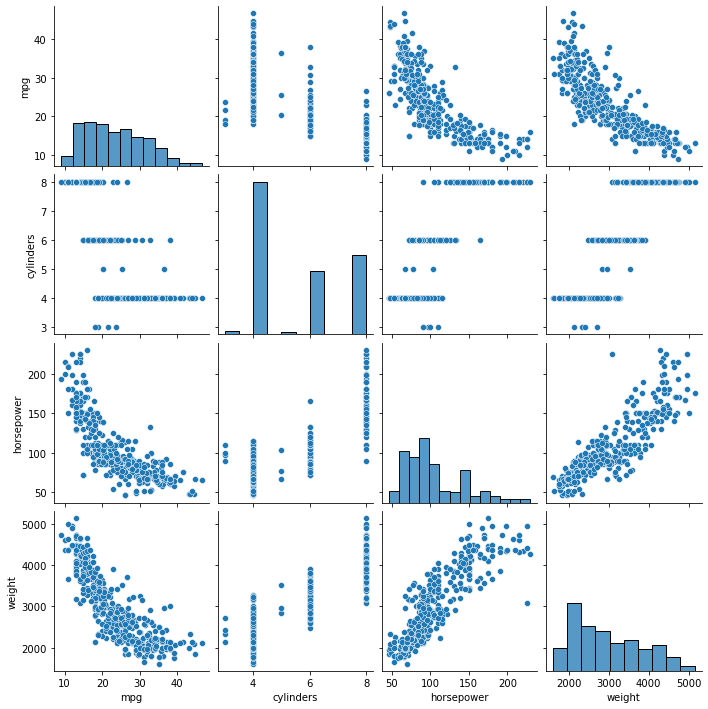

In [67]:
sns.pairplot(mpg_subset_frm)
plt.show()
plt.close()

In [68]:
print('종속변수 독립변수 분리 - ')
print('종속변수 - ')
y = mpg_subset_frm['mpg']
print('독립변수 - ')
x = mpg_subset_frm[['cylinders', 'horsepower','weight']]

종속변수 독립변수 분리 - 
종속변수 - 
독립변수 - 


In [69]:
x_train, x_test ,y_train, y_test = train_test_split(x, y,
                                                    test_size=0.2,
                                                    random_state=111)
x_train.shape, x_test.shape ,y_train.shape, y_test.shape

((313, 3), (79, 3), (313,), (79,))

In [70]:
mpg_linear_model = LinearRegression()
mpg_linear_model.fit(x_train, y_train)
print("w = 기울기 : ",mpg_linear_model.coef_)


print("모델의 신뢰도  - score)
r_squared = mpg_linear_model.score(x_test , y_test)
print(r_squared)
      
print("예측")
y_pred = mpg_linear_model.score(x_test , y_test)
print(y_pred)    
      


LinearRegression()